In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from pandas.plotting import scatter_matrix as sm
import matplotlib.pyplot as plt 
import numpy as np
import pickle as pk
from sklearn.preprocessing import StandardScaler 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pickle as pk

# train_df = pd.read_csv('D:/Utilisateurs/Bastien/Documents/Cours/CentraleSupelec/Electifs/Machine Learning/Evaluations/Assignment 2/mail-classification/train.csv', index_col=0)

## On prend un nombre de lignes inférieurs pour que tous nos tests d'affichage soient plus rapides
# train_df = pd.read_csv('D:/Utilisateurs/Bastien/Documents/Cours/CentraleSupelec/Electifs/Machine Learning/Evaluations/Assignment 2/mail-classification/train.csv', index_col=0, nrows=1000)
# print(train_df)

# Data Visualization

We'll try to emphasize patterns within the data. It would be great to see obvious clusters or relationships within our dataset. 

## I. Without dimensionality reduction

### I.A. Every feature

First, we will display every feature in one unified graph with functions such as scatter_matrix. It is a basic, yet efficient manner, to display the whole dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186C4DA4668>,
      dtype=object)

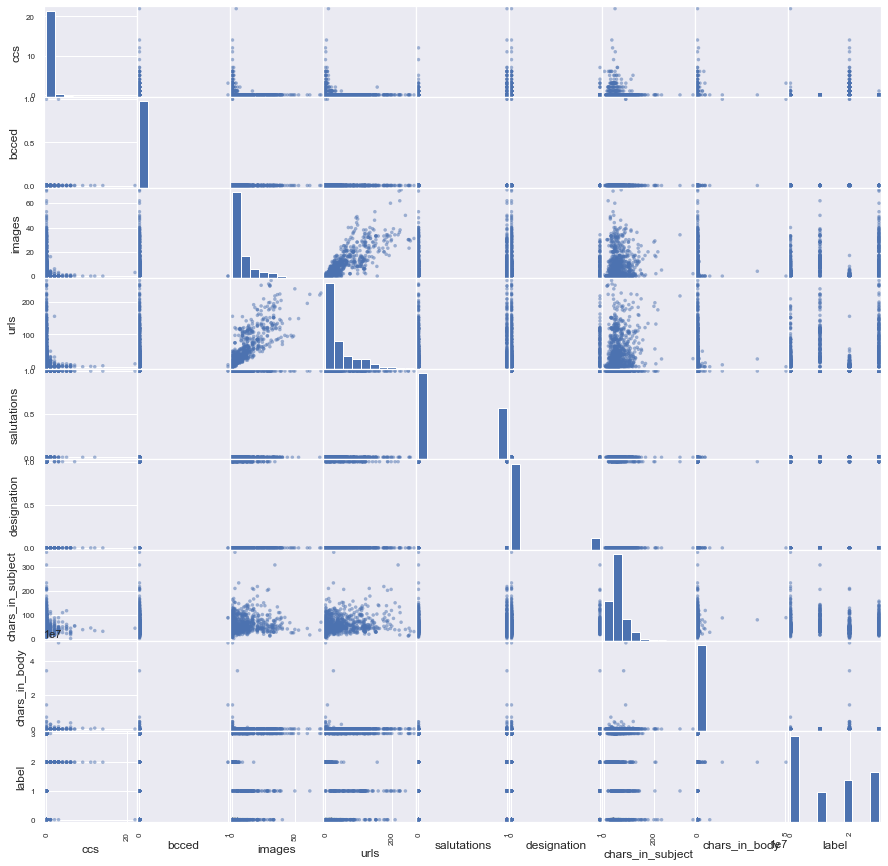

In [80]:
sm(train_df,diagonal='hist',figsize=(15,15), s=50, alpha=0.5);

Essayons un autre type d'affichage qui serait peut-être plus marquant.

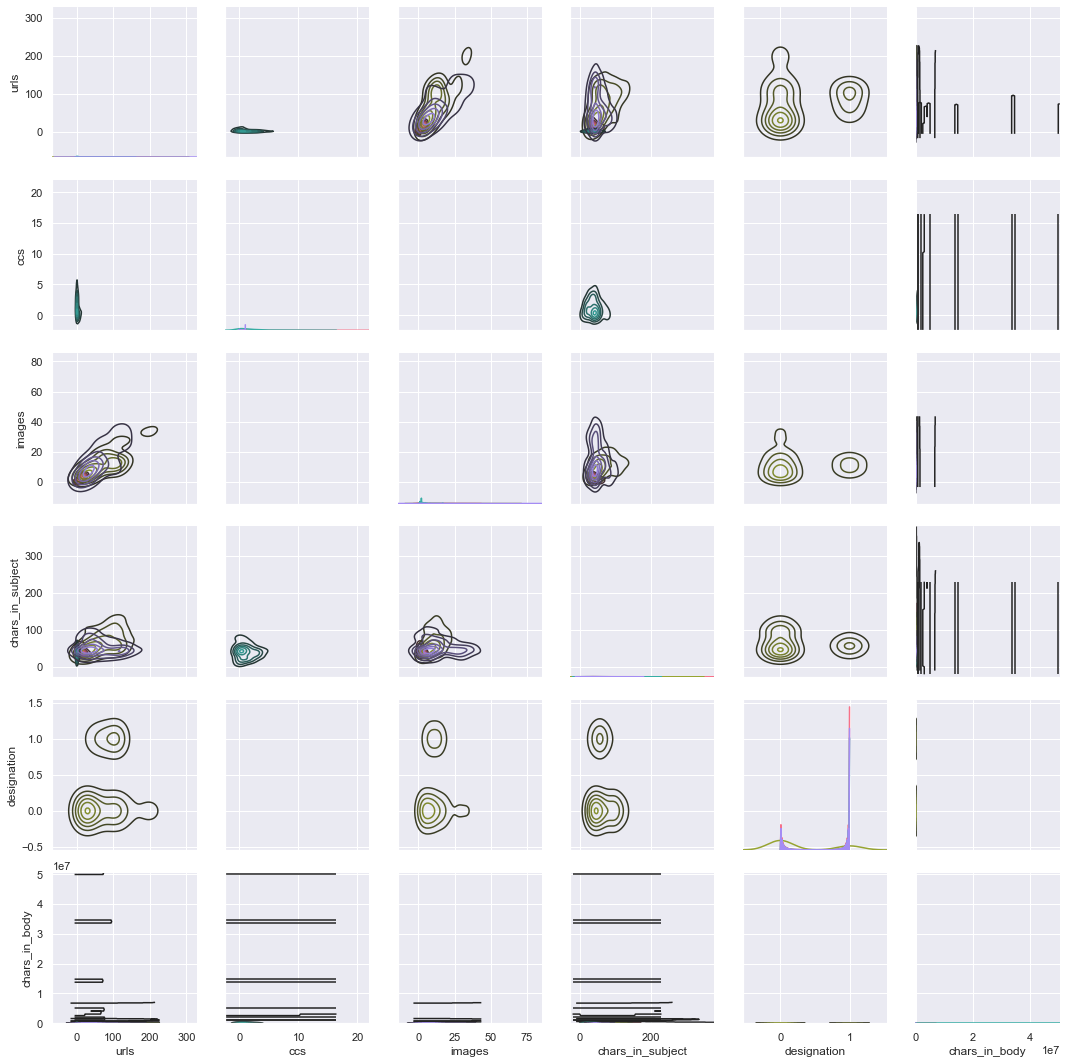

In [50]:
g = sns.PairGrid(train_df,vars=['urls','ccs','images','chars_in_subject','designation','chars_in_body'],hue='label',palette='husl')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

Désormais, il serait plus intéressant d'afficher certaines variables uniquement et d'établir un code couleur pour chaque label. Cela peut être fait de manière très intuitive à l'aide de la fonction prédéfinie pairplot du module seaborn.

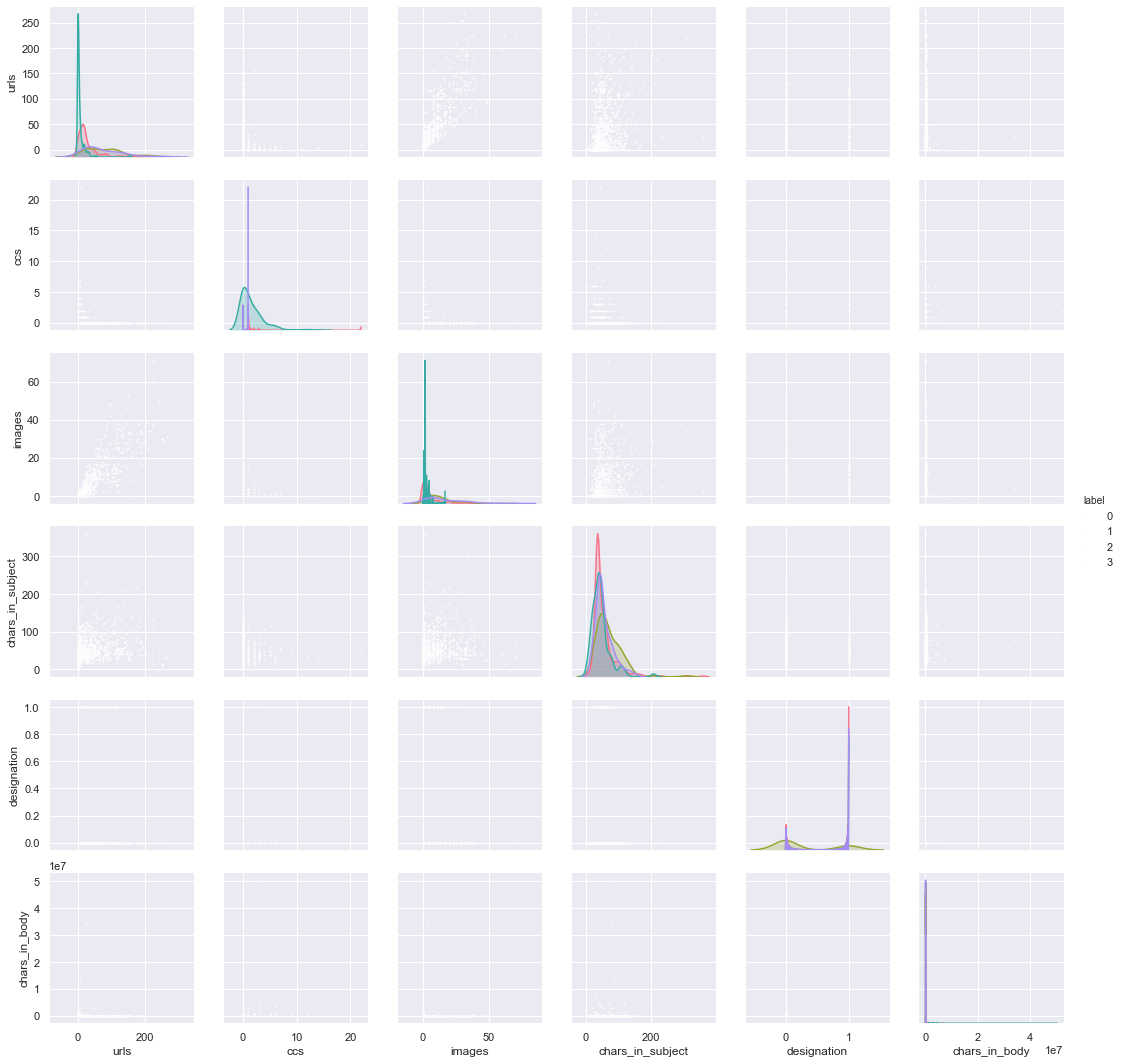

In [70]:
g = sns.pairplot(train_df, vars=['urls','ccs','images','chars_in_subject','designation','chars_in_body'], hue="label", palette='husl')

We should also try and plot a few correlation matrices. Maybe that would help us target the most relevant features.

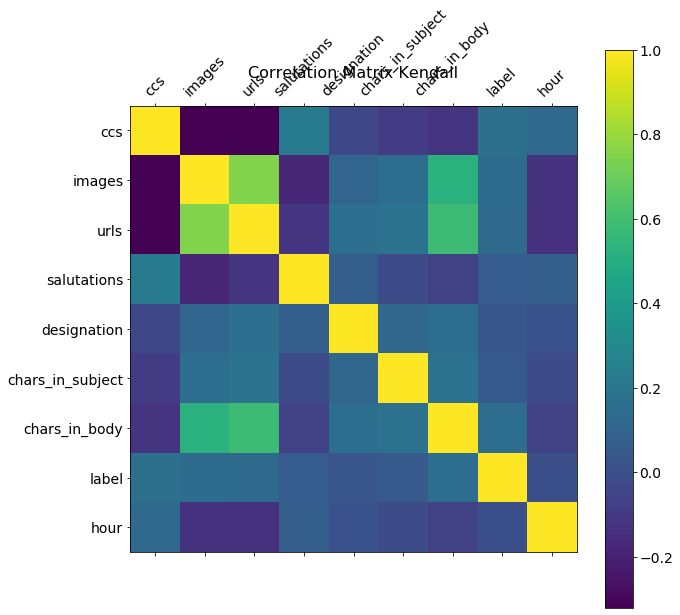

In [6]:
#Ouverture du data set
train = pd.read_csv("datasets/new_train.csv",index_col=0)
correlation_pearson=train.corr()


f = plt.figure(figsize=(10, 10))
plt.matshow(correlation_kendall, fignum=f.number)
plt.xticks(range(correlation_pearson.shape[1]), correlation_pearson.columns, fontsize=14, rotation=45)
plt.yticks(range(correlation_pearson.shape[1]), correlation_pearson.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix Kendall', fontsize=16);

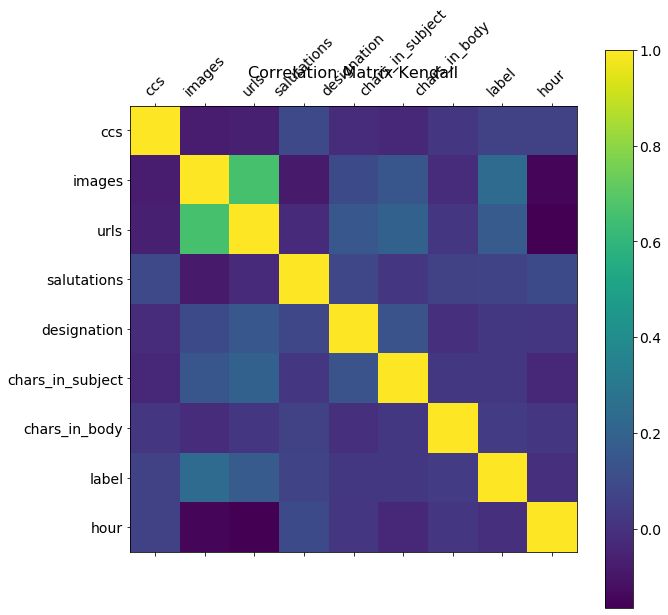

In [7]:
f = plt.figure(figsize=(10, 10))
correlation_kendall=train.corr(method='kendall')

#affichage des matrices
plt.matshow(correlation_pearson, fignum=f.number)
plt.xticks(range(correlation_kendall.shape[1]), correlation_kendall.columns, fontsize=14, rotation=45)
plt.yticks(range(correlation_kendall.shape[1]), correlation_kendall.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix Kendall', fontsize=16);

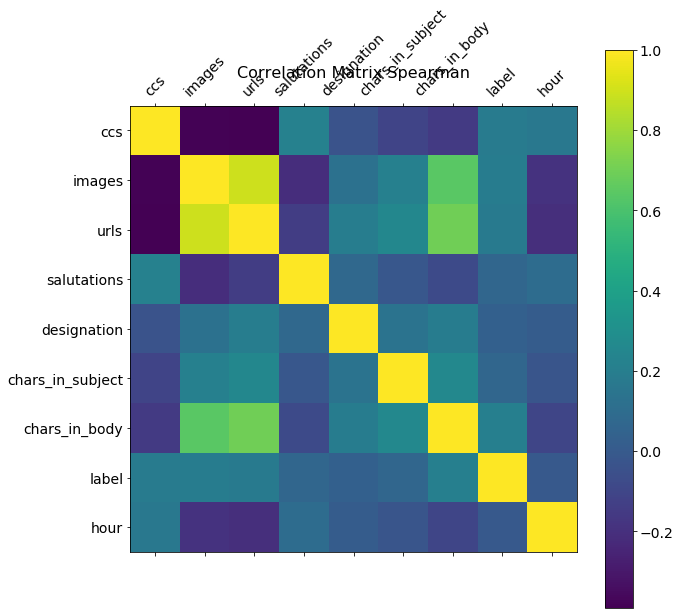

In [8]:
f = plt.figure(figsize=(10, 10))
correlation_spearman=train.corr(method='spearman')

#affichage des matrices
plt.matshow(correlation_spearman, fignum=f.number)
plt.xticks(range(correlation_spearman.shape[1]), correlation_spearman.columns, fontsize=14, rotation=45)
plt.yticks(range(correlation_spearman.shape[1]), correlation_spearman.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix Spearman', fontsize=16);

### I.B. Pairs of features

Il faut des graphes séparés et plus adaptés à chaque feature, les résultats affichés dans les cellules précédentes ne sont pas facilement interpretables.

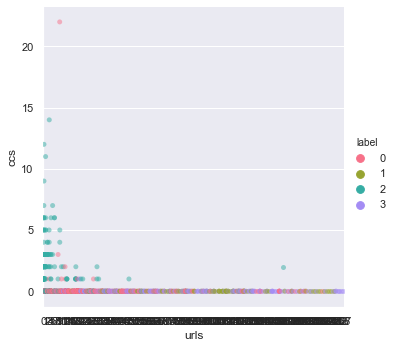

In [52]:
sns.catplot(x="urls", y="ccs", data=train_df,hue='label', palette='husl',alpha=0.5)

Il n'y clairement aucun intérêt à afficher cette paire de variable, on ne voit rien de marquant lors de l'affichage, que ce soit une tendance linéaire ou de potentiels clusters. Changeons de variables.

#### I.B.a) Distribution de chars_in_subject

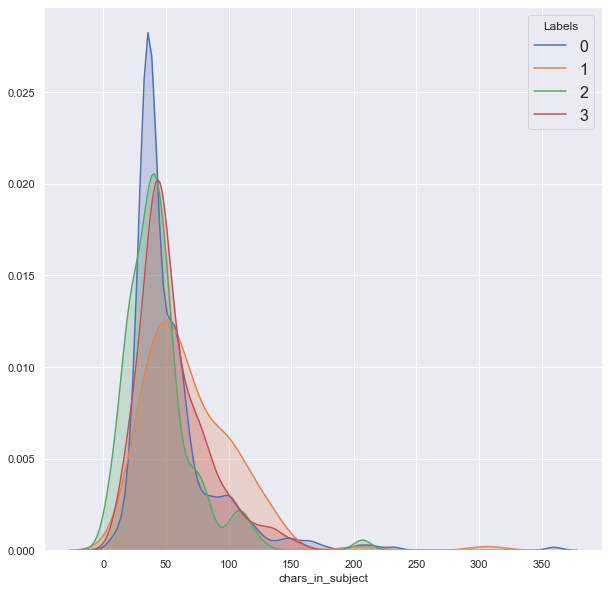

In [53]:
labels = np.unique(train_df['label']) 
fig = plt.figure(figsize=(10,10))

# Iterate through the labels
for label in labels:
    subset = train_df[train_df['label'] == label]
    sns.distplot(subset['chars_in_subject'], hist = False, kde = True, kde_kws = {'shade': True}, label = label)

# Plot formatting
plt.legend(prop={'size': 16}, title = 'Labels')

We can see that the greater the label, the more the average goes to the right of the plot, between 0 and 1 and 1 and 2, pair-wise.
Let's do the same with the number of images.

#### I.B.b) Number of images

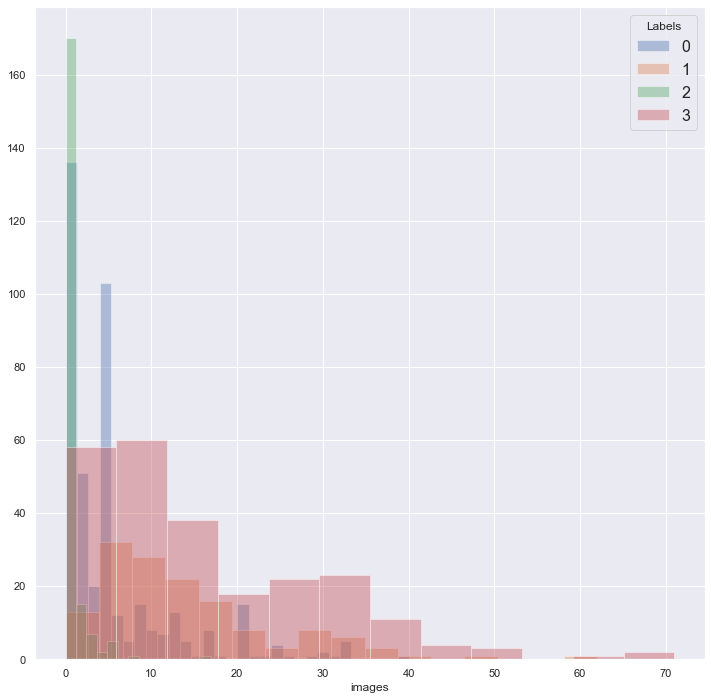

In [54]:
labels = np.unique(train_df['label']) 
fig = plt.figure(figsize=(12,12))

# Iterate through the labels
for label in labels:
    subset = train_df[train_df['label'] == label]
    sns.distplot(subset['images'], hist = True, kde = False, kde_kws = {'shade': True,'bins':20}, label = label)

# Plot formatting
plt.legend(prop={'size': 16}, title = 'Labels')

#### I.B.c) Chars_in_subject and number of images

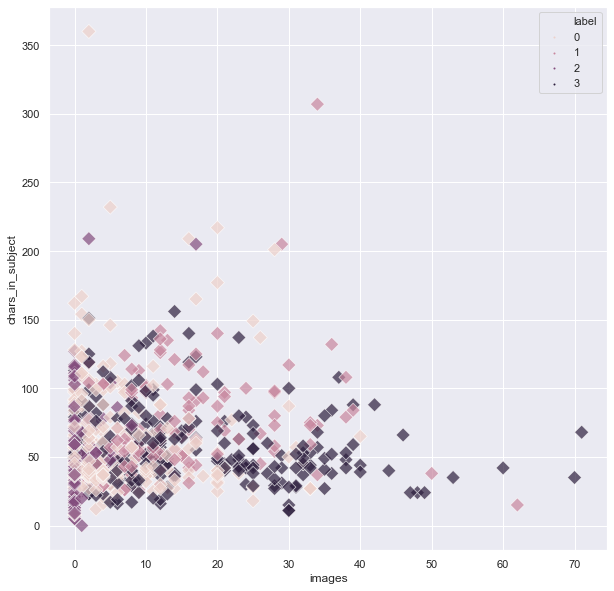

In [63]:
fig=plt.figure(figsize=(10,10))
sns.scatterplot(y="chars_in_subject", x="images", s=100, marker='D', data=train_df, hue='label',  alpha=0.7)

A nouveau, ce mode d'affichage n'est pas pertinent.

<Figure size 864x864 with 0 Axes>

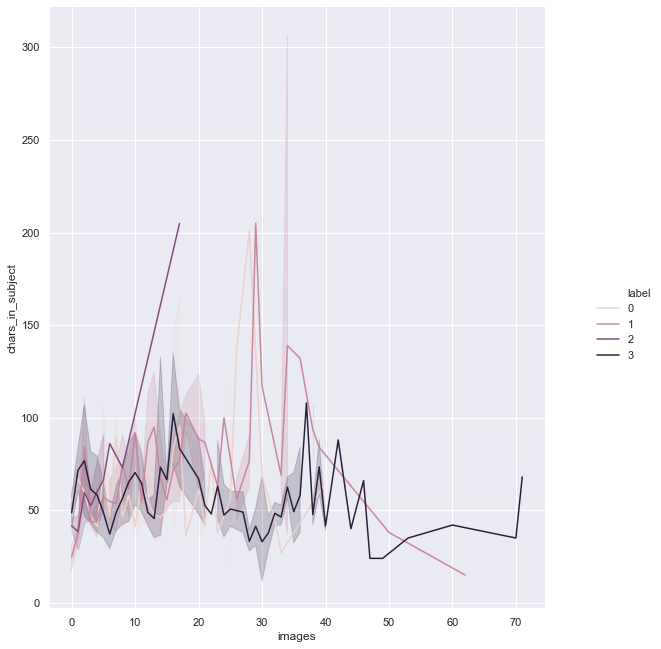

In [76]:
fig = plt.figure(figsize=(12,12))
g=sns.relplot(x="images", y="chars_in_subject", hue="label", facet_kws=dict(sharex=False), kind="line", legend="full", data=train_df);
g.fig.set_size_inches(10,10)

Idem, rien d'intéressant, il faudrait peut-être trouver un moyen de balayer toutes les représentations par paires pour pouvoir faire le choix de la meilleure.

#### I.B.d) Chars_in_subject and chars_in_body

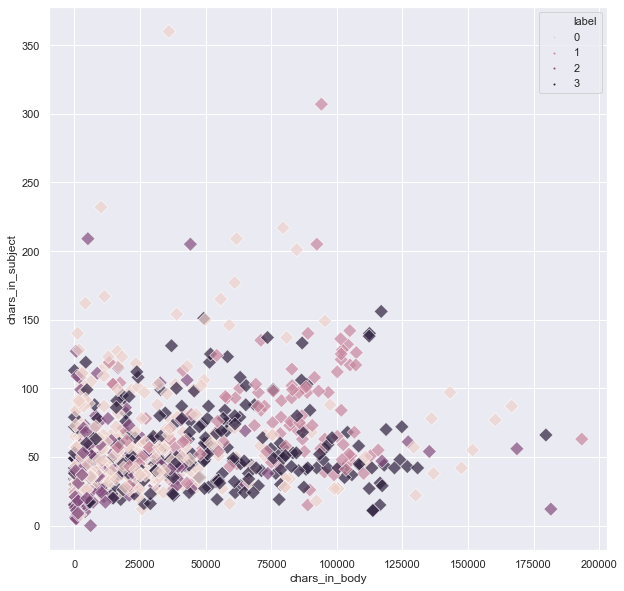

In [73]:
fig=plt.figure(figsize=(10,10))
sns.scatterplot(y="chars_in_subject", x="chars_in_body", s=100, marker='D', data=train_df[train_df['chars_in_body']<200000], hue='label',  alpha=0.7)

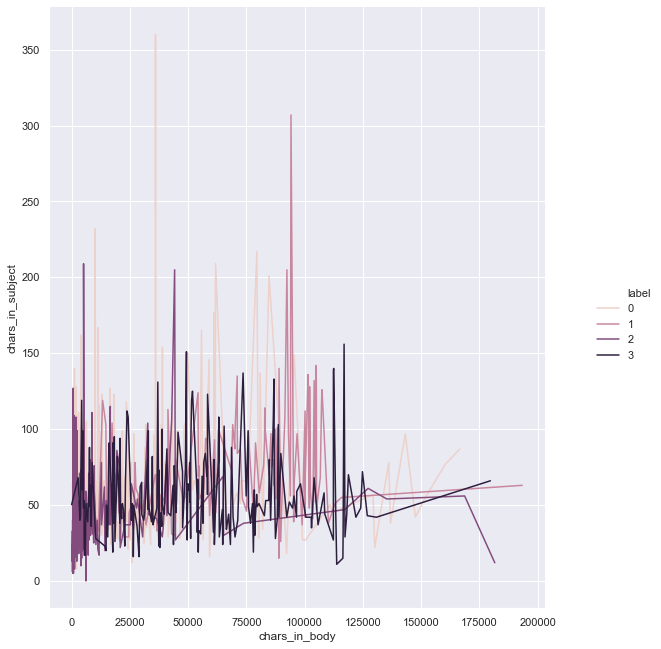

In [77]:
g=sns.relplot(y="chars_in_subject", x="chars_in_body", hue="label", facet_kws=dict(sharex=False), kind="line", legend="full", data=train_df[train_df['chars_in_body']<200000])
g.fig.set_size_inches(10,10)

### I.C. Data distribution : one feature at a time seperated by label
#### I.C.a) Images and label

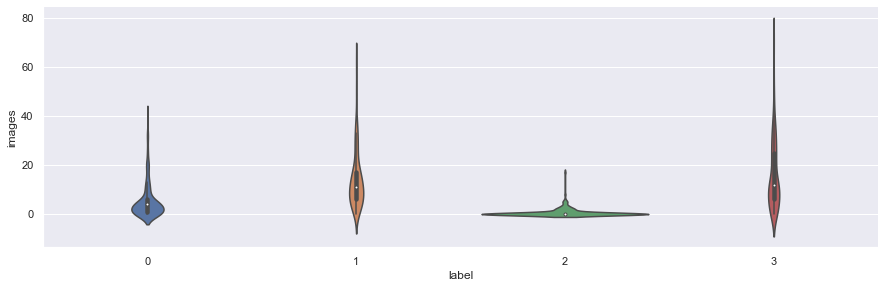

In [84]:
g=sns.catplot(x="label", y="images", kind="violin", data=train_df);
g.fig.set_size_inches(14,4)

#### I.C.b) Label and urls

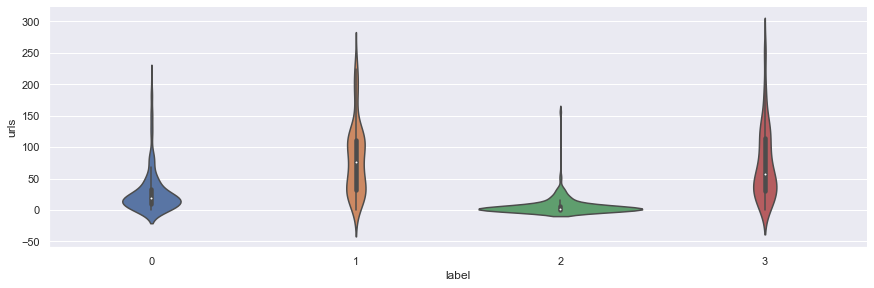

In [85]:
g=sns.catplot(x="label", y="urls", kind="violin", data=train_df);
g.fig.set_size_inches(14,4)

#### I.C.c) Label and chars_in_subject

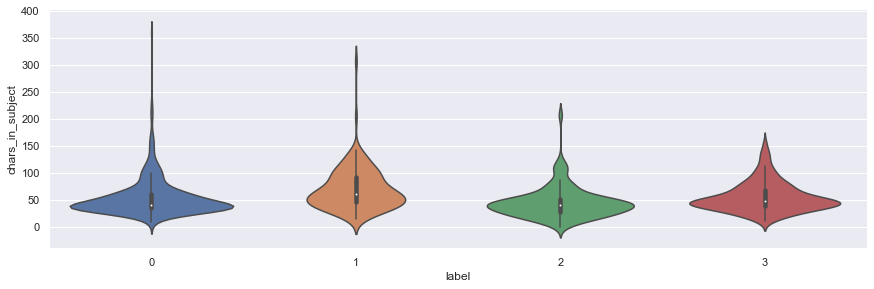

In [86]:
g=sns.catplot(x="label", y="chars_in_subject", kind="violin", data=train_df);
g.fig.set_size_inches(14,4)

#### I.C.d) Label and chars_in_body

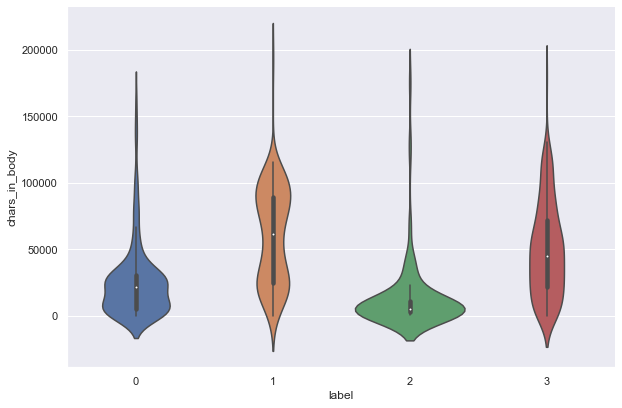

In [91]:
g=sns.catplot(x="label", y="chars_in_body", kind="violin", data=train_df[train_df['chars_in_body']<200000]);
g.fig.set_size_inches(10,6)

## I.D. Analyse

On remarque que les labels 0 et 2 ainsi que 1 et 3 pris deux à deux sont très souvent similaires dans les représentations. On peut se demander pourquoi et surtout se demander s'il est nécessaire de garder 4 catégories et non pas deux seulement.

## II. With dimensionality reduction

On a trois classificateurs LDA qui ont déjà été entrainés pour pouvoir projeter notre dataset en dimension 1,2 ou 3. on veut voir comment évolue la représentation de nos données lorsque les données ont été projetées.

### II.A. Importing the classifiers

In [4]:
with open('lda_classifiers.txt','rb') as fichier:
    pickler=pk.Unpickler(fichier)
    listEncoders=pickler.load()
    
clf1, clf2, clf3 = listEncoders[0], listEncoders[1], listEncoders[2]

### II.B. Importing our data

In [7]:
#Importing
train = pd.read_csv('datasets/trainEncoded.csv', index_col=0)
X=train.drop('label',axis=1).values
y=train['label'].values;
#Scaling
sc = StandardScaler()
X_scaled=sc.fit_transform(X)

### II.C. Projecting the data

In [8]:
#Projecting data on a one, two or three dimension subspace
X_one_dim=clf1.transform(X_scaled)
X_two_dim=clf2.transform(X_scaled)
X_three_dim=clf3.transform(X_scaled)

In [9]:
### Reconstructing pandas dataframes
df_one_dim=pd.DataFrame(X_one_dim, columns=['A'])
df_one_dim['label']=y

df_two_dim=pd.DataFrame(X_two_dim, columns=['A','B'])
df_two_dim['label']=y

df_three_dim=pd.DataFrame(X_three_dim, columns=['A','B','C'])
df_three_dim['label']=y

df_one_dim.head(2)

,A,label
0,-2.258708,0
1,0.656524,0


### II.D. Three dimension data visualization

D:\Programmes files (x86)\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Programmes files (x86)\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


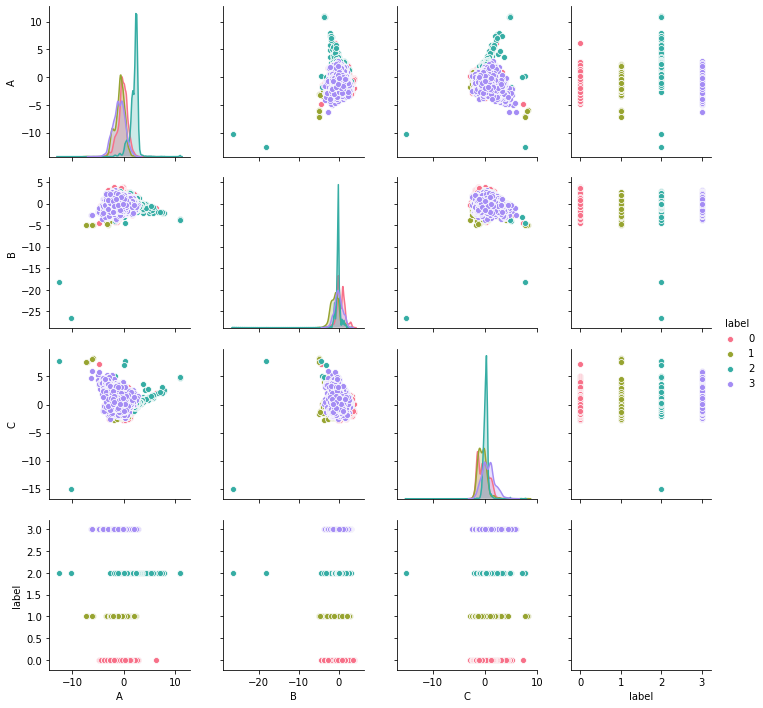

In [12]:
g = sns.pairplot(df_three_dim, hue="label", palette='husl')

The class separation does not look any better. Obviously.

### II.E. Two-dimension data visualization

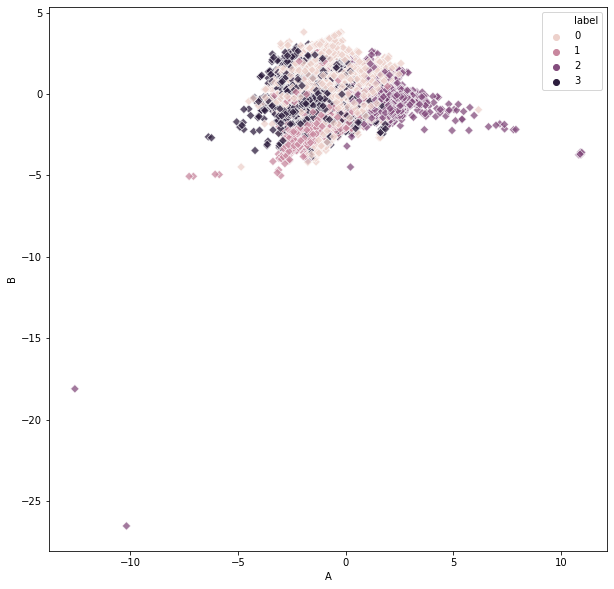

In [16]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(x="A", y="B", hue="label", data=df_two_dim, marker='D', alpha=0.75);

Quite a melting pot...

### II.F. One-dimension plot

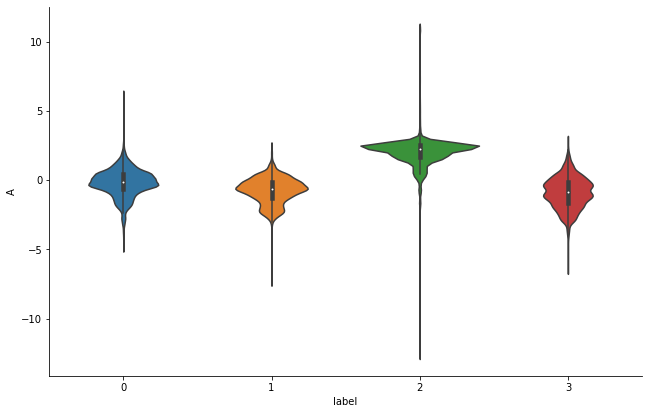

In [17]:
g=sns.catplot(x="label", y="A", kind="violin", data=df_one_dim);
g.fig.set_size_inches(10,6)

The distribution of the second category is a bit different, though unsufficient for clear seperation.

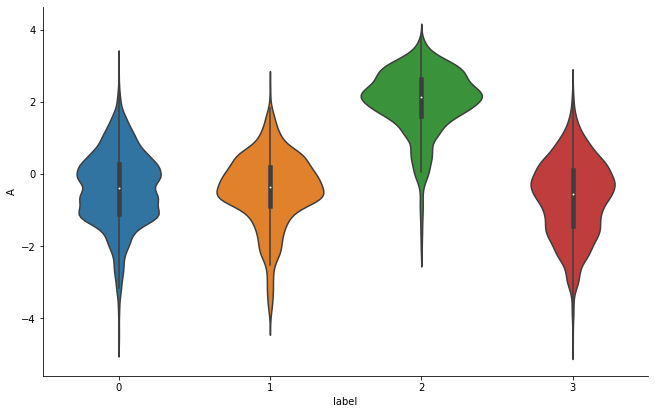

In [15]:
g=sns.catplot(x="label", y="A", kind="violin", data=df_three_dim);
g.fig.set_size_inches(10,6)